# Python 機器學習從零至一 

> 數列運算

[數據交點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 關於 NumPy

## NumPy 是什麼？

> NumPy 是 Numeric Python 的簡稱，Python 科學計算的第三方模組（套件），NumPy 創造了「多維度陣列」的資料結構以及大量的通用函數與聚合函數，讓 Python 使用者能夠對數值陣列進行快速的數值計算、使用基礎的統計函數、進行基礎的線性代數運算以及操作隨機的模擬任務。

來源：<https://numpy.org/>

## NumPy 的前身為兩個模組（套件）

- 1990 年代中期開發的 Numeric 模組（套件）。
- Numarray 模組（套件）。
- NumPy 於 2005 集兩者之大成問世。

來源： <https://www.nature.com/articles/s41586-020-2649-2>

## 以 `import` 指令載入 `numpy`

`numpy` 的官方縮寫為 `np`。

In [2]:
import numpy as np

## 如果環境中沒有安裝 `numpy`，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'numpy'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install` 指令安裝

```bash
pip install numpy
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(np.__version__)
print(np.__file__)

1.20.2
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/numpy/__init__.py


## 資料分析為什麼採用 NumPy？

- Python 內建的資料結構為異質性，優點是儲存彈性大。
- NumPy 定義的資料結構 `ndarray` 為同質性，優點是運算效率高。

## 以內建的 `list` 觀察異質性特徵

In [4]:
heterogeneous_list = [False, True, 5566, 55.66, 'Luke Skywalker']
for elem in heterogeneous_list:
    print(type(elem))

<class 'bool'>
<class 'bool'>
<class 'int'>
<class 'float'>
<class 'str'>


## 以 NumPy 定義的 `ndarray` 觀察同質性特徵

In [5]:
homogeneous_arr = np.array(heterogeneous_list)
for elem in homogeneous_arr:
    print(type(elem))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


## 同質性資料結構的優點是運算效率高

對一百萬個隨機整數（介於 1 到 100 之間）取倒數。

In [6]:
m = 1000000
large_array = np.random.randint(1, 100, size=m)
large_list = list(large_array)
print(type(large_array))
print(type(large_list))

<class 'numpy.ndarray'>
<class 'list'>


In [7]:
# Computing reciprocals for large list
start_time = time.time()
reciprocals = [1 / i for i in large_list]
end_time = time.time()
computing_time = end_time - start_time
print("Computing time for {:,} repicprocals: {:.2f} seconds.".format(m, computing_time))

Computing time for 1,000,000 repicprocals: 0.21 seconds.


In [8]:
# Computing for large array
start_time = time.time()
reciprocals = 1 / large_array
end_time = time.time()
computing_time = end_time - start_time
print("Computing time for {:,} repicprocals: {:.2f} seconds.".format(m, computing_time))

Computing time for 1,000,000 repicprocals: 0.03 seconds.


## 我們仰賴的 NumPy 核心功能

- 多維度陣列的操作。
- 適用於多維度陣列的通用、聚合函數。

## 創造多維度陣列

## 從 `list` 創造 `ndarray`

In [9]:
lst = [2, 3, 5, 7, 11]
arr = np.array(lst)
print(arr)
print(type(arr))

[ 2  3  5  7 11]
<class 'numpy.ndarray'>


##  利用 NumPy 定義的函數創造內容元素相同的 `ndarray`

In [10]:
print(np.zeros(5, dtype=int))
print(np.ones(5, dtype=float))
print(np.full(5, 6))

[0 0 0 0 0]
[1. 1. 1. 1. 1.]
[6 6 6 6 6]


## 利用 NumPy 定義的函數創造序列型態的 `ndarray`

In [11]:
print(np.arange(1, 11, 2))
print(np.linspace(1, 9, 5, dtype=int))

[1 3 5 7 9]
[1 3 5 7 9]


## 利用 NumPy 的模組 `random` 所定義的函數創造隨機性的 `ndarray`

In [12]:
m = 10000
uniform_arr = np.random.random(m)
normal_arr = np.random.normal(0, 1, m)
randint_arr = np.random.randint(1, 7, size=m)
print(uniform_arr)
print(normal_arr)
print(randint_arr)

[0.69218565 0.5565712  0.55104089 ... 0.56999959 0.14560198 0.03924263]
[-0.72460957  0.21239962  0.33350591 ...  0.19845189  0.11919138
 -0.2180172 ]
[3 4 1 ... 1 3 5]


## 利用直方圖檢視陣列中隨機數的分配

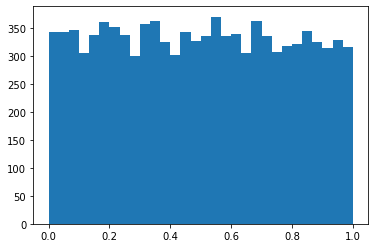

In [13]:
fig = plt.figure()
ax = plt.axes()
ax.hist(uniform_arr, bins=30)
plt.show()

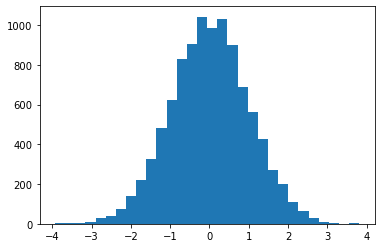

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.hist(normal_arr, bins=30)
plt.show()

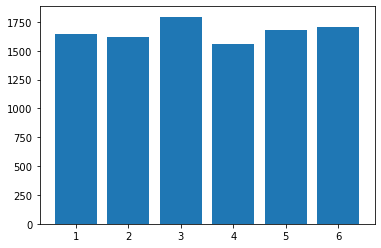

In [15]:
uniques, counts = np.unique(randint_arr, return_counts=True)
fig = plt.figure()
ax = plt.axes()
ax.bar(uniques, counts)
plt.show()

## 常用來檢視多維度陣列的屬性

- `ndim` 維度個數。
- `shape` 陣列外型。
- `size` 元素個數。
- `dtype` 資料型態。

In [16]:
lst = [2, 3, 5, 7, 11]
arr = np.array(lst)
print(arr.ndim)
print(arr.shape)
print(arr.size)
print(arr.dtype)

1
(5,)
5
int64


In [17]:
arr = np.array([lst], dtype=float)
print(arr.ndim)
print(arr.shape)
print(arr.size)
print(arr.dtype)

2
(1, 5)
5
float64


## 不同維度數的陣列有不同的暱稱

- 零維陣列：純量（Scalar）。
- 一維陣列：向量（Vector）。
- 二維陣列：矩陣（Matrix）。
- 三維或者 n 維陣列：張量（Tensor）。

## 純量、向量、矩陣與張量外型示意圖

![Imgur](https://i.imgur.com/81fM6Hf.png)

來源：<https://dev.to/juancarlospaco/tensors-for-busy-people-315k>

In [18]:
scalar = np.array(5566)
print(scalar)
print(scalar.ndim)
print(scalar.shape)

5566
0
()


In [19]:
vector = np.array([5566])
print(vector)
print(vector.ndim)
print(vector.shape)

[5566]
1
(1,)


In [20]:
matrix = np.array([[5, 5],
                   [6, 6]])
print(matrix)
print(matrix.ndim)
print(matrix.shape)

[[5 5]
 [6 6]]
2
(2, 2)


In [21]:
tensor = np.array([[[5, 5],
                    [6, 6]],
                   [[5, 5],
                    [6, 6]],
                   [[5, 5],
                    [6, 6]]])
print(tensor)
print(tensor.ndim)
print(tensor.shape)

[[[5 5]
  [6 6]]

 [[5 5]
  [6 6]]

 [[5 5]
  [6 6]]]
3
(3, 2, 2)


## 多維度陣列與 `list` 的相異之處

## 多維度陣列具有 Broadcasting 的特性

In [22]:
lst = [5, 5, 6, 6]
try:
    print(lst * 2.0)
except TypeError as e:
    print(e)

can't multiply sequence by non-int of type 'float'


In [23]:
arr = np.array(lst)
print(arr * 2.0)

[10. 10. 12. 12.]


## 多維度陣列運算時產生 Broadcasting 的條件

- 運算的對象是純量。
- 外型的數值相同。
- 外型的數值其中一者為 1。

In [24]:
# 運算的對象是純量
arr_a = np.array([5, 5, 6, 6])
b = 2
arr_a * b

array([10, 10, 12, 12])

In [25]:
# 外型的數值相同
arr_a = np.array([5, 5, 6, 6]) # (4,)
arr_b = np.array([2, 2, 2, 2]) # (4,)
arr_a * arr_b

array([10, 10, 12, 12])

In [26]:
# 外型的數值其中一者為 1
arr_a = np.array([5, 5, 6, 6])               # (4,)
arr_b = np.array([2, 2, 2, 2]).reshape(4, 1) # (4, 1)
arr_a * arr_b

array([[10, 10, 12, 12],
       [10, 10, 12, 12],
       [10, 10, 12, 12],
       [10, 10, 12, 12]])

In [27]:
# 外型的數值其中一者為 1
arr_a = np.array([5, 5, 6, 6]).reshape(4, 1) # (4, 1)
arr_b = np.array([2, 2, 2, 2]).reshape(1, 4) # (1, 4)
arr_a * arr_b

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [12, 12, 12, 12],
       [12, 12, 12, 12]])

## 多維度陣列特殊的索引語法

- 二維以上陣列的便捷索引語法。
- 華麗索引（Fancy indexing）。
- 布林索引（Boolean indexing）。

## 索引多維度陣列可以用 `ndarray` 便捷的語法 `[i, j, k, ...]`

In [28]:
arr = np.arange(1, 13).reshape(3, 4)
print(arr)
print(arr[1, 1])  # 6 locates at [1, 1]
print(arr[2, -3]) # 10 locates at [2, -3]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
6
10


In [29]:
print(arr[:, 1])   # dimensions reduced
print(arr[:, [1]]) # keep dimensions

[ 2  6 10]
[[ 2]
 [ 6]
 [10]]


## 什麼是華麗索引？

對應多維度陣列時，中括號除了可以傳入單一整數或切割語法，亦允許傳入序列，藉此可以更有彈性地取出多維度陣列中的元素。

In [30]:
arr = np.array([2, 3, 5, 7, 11])
indices = [0, 1, 4]
print(arr)
print(arr[indices])

[ 2  3  5  7 11]
[ 2  3 11]


## 什麼是布林索引？

對應多維度陣列時，中括號除了可以傳入單一整數、切割語法或者序列，亦允許傳入以 `bool` 組成的相同長度序列，藉此可以更有彈性地取出多維度陣列中的元素。

In [31]:
arr = np.array([2, 3, 5, 7, 11])
bools = [False, True, True, True, True]
print(arr)
print(arr[bools])

[ 2  3  5  7 11]
[ 3  5  7 11]


In [32]:
is_odd = arr % 2 == 1
print(is_odd)
print(arr[is_odd])

[False  True  True  True  True]
[ 3  5  7 11]


## 常見的多維度陣列操作

## 調整多維度陣列的外型

- 多維度陣列的 `reshape(m, n, ...)` 方法。
- 多維度陣列的 `ravel` 方法。

In [33]:
arr = np.arange(1, 10)
print(arr)
print(arr.shape)
print(arr.reshape(3, 3))
print(arr.reshape(3, 3).shape)

[1 2 3 4 5 6 7 8 9]
(9,)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


## `reshape` 方法在其他 `ndim - 1` 維度已經決定時可以方便地指定 `-1` 給最後一個維度

In [34]:
arr = np.arange(1, 13)
print(arr.reshape(3, -1))
print(arr.reshape(-1, 3))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


## 使用 `ravel` 方法將 n 維陣列調整成一維陣列（向量）

In [35]:
arr = np.arange(1, 10).reshape(3, -1)
print(arr.shape)
print(arr.ndim)
print(arr.ravel().shape)
print(arr.ravel().ndim)

(3, 3)
2
(9,)
1


## 複製一個多維度陣列

重新宣告不會複製一個多維度陣列，相反地，它讓兩個物件名稱共享一個多維度陣列的資料值，但是卻能有不同的外型，我們稱呼新宣告的物件其實是原始物件的 View。

In [36]:
vector = np.arange(1, 10)
matrix = vector.reshape(3, 3)
matrix[1, 1] = 5566
print(vector)
print(matrix)

[   1    2    3    4 5566    6    7    8    9]
[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]


## 重新宣告預設「不複製」其實也是 `list` 的一個特性

In [37]:
a_list = [2, 3, 5, 7, 11]
another_list = a_list
another_list[-1] = 13
print(a_list)
print(another_list)

[2, 3, 5, 7, 13]
[2, 3, 5, 7, 13]


In [38]:
from copy import deepcopy

a_list = [2, 3, 5, 7, 11]
another_list = deepcopy(a_list)
another_list[-1] = 13
print(a_list)
print(another_list)

[2, 3, 5, 7, 11]
[2, 3, 5, 7, 13]


## 使用 `copy()` 方法明確地複製多維度陣列

In [39]:
vector = np.arange(1, 10)
matrix = vector.copy().reshape(3, 3)
matrix[1, 1] = 5566
print(vector)
print(matrix)

[1 2 3 4 5 6 7 8 9]
[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]


## 使用 `np.concatenate()` 函數合併多維度陣列

- 指定參數 `axis=0` 垂直合併（預設值）。
- 指定參數 `axis=1` 水平合併。

In [40]:
arr_a = np.arange(1, 5).reshape(2, 2)
arr_b = np.arange(5, 9).reshape(2, 2)
print(np.concatenate([arr_a, arr_b]))         # default, axis=0
print(np.concatenate([arr_a, arr_b], axis=1)) # axis=1

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


## 使用 `np.split()` 函數分割多維度陣列

- 指定參數 `axis=0` 垂直分割（預設值）。
- 指定參數 `axis=1` 水平分割。

In [41]:
arr = np.arange(20).reshape(-1, 2)
upper_arr, lower_arr = np.split(arr, 2)
print(upper_arr)
print(lower_arr)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [42]:
arr = np.arange(20).reshape(-1, 2)
left_arr, right_arr = np.split(arr, 2, axis=1)
print(left_arr)
print(right_arr)

[[ 0]
 [ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]
 [12]
 [14]
 [16]
 [18]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [43]:
arr = np.arange(20).reshape(-1, 2)
upper_arr, lower_arr = np.split(arr, [7])
print(upper_arr)
print(lower_arr)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]
[[14 15]
 [16 17]
 [18 19]]


## NumPy 函數

## NumPy 提供非常豐富、適用多維度陣列的數值運算函數

- 通用函數（Universal functions）。
- 聚合函數（Aggregate functions）。
- 常用的向量與矩陣計算函數。

## 什麼是通用函數？

通用函數是具備向量化（Vectorized）特性的函數，接受固定數量、外型的輸入並對應相同數量、外型的輸出。

In [44]:
# np.power is a universal function
arr = np.arange(10)
print(arr)
print(np.power(arr, 2)) # arr**2

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [45]:
# np.exp is a universal function
print(np.exp(arr))

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [46]:
# np.log is a universal function
arr = np.arange(1, 11)
print(arr)
print(np.log(arr))

[ 1  2  3  4  5  6  7  8  9 10]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


## 除了 NumPy 已經定義好的通用函數，還可以自行定義適用多維度陣列的通用函數

使用 `np.vectorize()` 函數可以將純量函數轉換成為通用函數。

In [47]:
# scalar function
def is_prime(x):
    if x == 2 or x == 3:
        return True
    if x % 2 == 0 or x < 2:
        return False
    square_root = int(x**0.5)
    for i in range(3, square_root + 1, 2):
        if x % i == 0:
            return False
    return True
print(type(is_prime))
print(is_prime(2))
#print(is_prime([1, 2, 3, 4, 5])) # Error occurs

<class 'function'>
True


In [48]:
is_prime_ufunc = np.vectorize(is_prime)
arr = np.array([1, 2, 3, 4, 5])
print(type(is_prime_ufunc))
print(arr)
print(is_prime_ufunc(arr))

<class 'numpy.vectorize'>
[1 2 3 4 5]
[False  True  True False  True]


## 什麼是聚合函數？

聚合函數是能夠將多列觀測值輸入摘要為單一值輸出的函數。

## NumPy 的聚合函數有兩個值得注意的特性

1. 可以沿指定的軸（axis）進行聚合。
2. 針對含有 `np.NaN`（Not a Number）的陣列有相對應名稱的聚合函數可以運算。

In [49]:
# Aggregate along specific axis
mat = np.arange(1, 16).reshape(3, 5)
print(np.sum(mat))
print(np.sum(mat, axis=0))
print(np.sum(mat, axis=1))

120
[18 21 24 27 30]
[15 40 65]


## NumPy 除了定義類別、函數，亦有定義常數 

Not a Number 可以表示「未定義」或「遺漏」的浮點數。

來源：<https://numpy.org/doc/stable/reference/constants.html>

In [50]:
nan = np.nan # np.NaN
print(nan)
print(type(nan))

nan
<class 'float'>


In [51]:
# Similar function names for array with missing values
arr = np.arange(1, 16, dtype=float)
arr[-1] = nan
print(arr)
print(np.sum(arr))
print(np.nansum(arr))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. nan]
nan
105.0


## 常用聚合函式與 Not a Number 的對應

- `np.sum()` 與 `np.nansum()`
- `np.prod()` 與 `np.nanprod()`
- `np.mean()` 與 `np.nanmean()`
- `np.median()` 與 `np.nanmedian()`
- `np.std()` 與 `np.nanstd()`

## 常用聚合函式與 Not a Number 的對應（續）

- `np.var()` 與 `np.nanvar()`
- `np.min()` 與 `np.nanmin()`
- `np.max()` 與 `np.nanmax()`
- `np.argmin()` 與 `np.nanargmin()`
- `np.argmax()` 與 `np.nanargmax()`

## 使用 `np.eye()` 函數可以建立單位矩陣（Identity matrix），命名是取 I 的諧音

In [52]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 使用 `np.dot()` 函數可以進行向量內積與矩陣相乘

In [53]:
vector = np.array([5, 5, 6, 6])
np.dot(vector, vector)

122

In [54]:
matrix = vector.reshape(2, -1)
np.dot(matrix, matrix)

array([[55, 55],
       [66, 66]])

## 也可以使用多維度陣列的 `dot()` 方法進行向量內積與矩陣相乘

In [55]:
vector.dot(vector)

122

In [56]:
matrix.dot(matrix)

array([[55, 55],
       [66, 66]])

## 使用 `np.transpose()`  函數進行轉置

In [57]:
matrix = np.arange(6).reshape(2, 3)
print(matrix)
print(np.transpose(matrix))

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]


## 也可以使用多維度陣列的 `T` 屬性轉置

In [58]:
matrix.T

array([[0, 3],
       [1, 4],
       [2, 5]])

## 使用 `np.linalg.inv()` 函數求解反矩陣

反矩陣在矩陣運算中扮演的角色就像「倒數」在代數運算中一般。

## 代數運算中我們想要求解 $x$ 會在等號左右兩側都乘 $a$ 的倒數

\begin{align}
ax &= b \\
\frac{1}{a}ax &= \frac{1}{a}b\\
x &= \frac{b}{a}
\end{align}

## 在矩陣運算中想要求解 $X$ 就會在等號左右兩側都乘 $A$ 的反矩陣 $A^{-1}$

\begin{align}
AX &= B \\
A^{-1}AX &= A^{-1}B \\
IX &= A^{-1}B \\
X &= A^{-1}B
\end{align}

In [59]:
A = np.array([1, 2, 3, 4]).reshape(2, 2)
B = np.array([5, 6, 7, 8]).reshape(2, 2)
A_inv = np.linalg.inv(A)
X = np.dot(A_inv, B)
print(X)
print(A.dot(X))

[[-3. -4.]
 [ 4.  5.]]
[[5. 6.]
 [7. 8.]]
